# Animating a plot
Often times it is useful to create an animation to demonstrate changes in a system through time. Here we will consider creating an animation of the changes of a histogram through time. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import call


First let us grab a list of the files we wish to plot use os.listdir.

In [2]:
data_directory = 'histograms'
files = os.listdir(data_directory)
print("number of files: ", len(files))
print(files)

number of files:  17
['.DS_Store', 'hist_000015000000.txt', 'hist_000020000000.txt', 'hist_000025000000.txt', 'hist_000030000000.txt', 'hist_000035000000.txt', 'hist_000040000000.txt', 'hist_000045000000.txt', 'hist_000050000000.txt', 'hist_000055000000.txt', 'hist_000060000000.txt', 'hist_000065000000.txt', 'hist_000070000000.txt', 'hist_000075000000.txt', 'hist_000080000000.txt', 'hist_000085000000.txt', 'hist_000090000000.txt']


First, let's set up some code to loop over the files in the directory.  

We'll make use of the ```find``` function to ensure that we are only parsing the appropriate files, in thise case, those that start with "hist_" and end in ".txt".  

In this example, we'll also want to know which timestep the data corresponds to.  We can do this two ways. 
- The files themselves have the timestep encoded into their name (i.e., "hist_000004700000.txt" corresponds to timestep 4700000).  

This information is also encoded in the header of the file as "t":


    E h_E T_E at t = 4700000 f-1 = 0.000250000000000; edges: 4 47 (-37500.000000 -33200.000000); nbins = 78; mean = 0.000000; fluctuation = -1.000000; flat = 0; low-end flattening = 1; converged = 0


Below we will demonstrate how to extract the timestep from both sources. 

In [3]:
for file in files:
    #let's make sure we are only loading histogram files, i.e., those that start with "hist_" and ends in ".txt"
    #Note file.find returns the position in the string; if no match is found it returns -1
    if file.find('hist_') != -1:
        if file.find('.txt') != -1:
            
            #get the timestep this corresponds to from the file name
            temp_file = file.replace('hist_', '')
            temp_file = temp_file.replace('.txt', '')
            #this is just an extra check to make sure the filename is formatted as expected
            if temp_file.isdigit():
                timestep = int(temp_file)
            
            #get the timestep this corresponds to from the header
            #we'll just read in the first line of the file
            current_file = data_directory+"/"+file
            with open(current_file) as f:
                line = f.readline()
                temp_array= line.strip().split(' ')
            f.close()
            f_t = temp_array[6]
            
            #print out the timestep from both methods
            print(timestep, "\t", f_t)

            
        

15000000 	 15000000
20000000 	 20000000
25000000 	 25000000
30000000 	 30000000
35000000 	 35000000
40000000 	 40000000
45000000 	 45000000
50000000 	 50000000
55000000 	 55000000
60000000 	 60000000
65000000 	 65000000
70000000 	 70000000
75000000 	 75000000
80000000 	 80000000
85000000 	 85000000
90000000 	 90000000


Now, we will actually load the data from the files and generate a plot. 

Here, we will rely upon the second approach of extracting the timestep so that we can also extract the "mean" value from the header. Note, we will still use the code in the "first" approach, but simply use this as means to further validate we are loading in the right file (i.e.,  this ensure that we would only load in file formatted such as, "hist_000030000000.txt" and would ignore something like, "hist_temp.txt"). This is by no means the most direct or only way to validate file name formatting, but is convenient given the code already written.

In this code we will generate separate plots and also output the same plots png images.

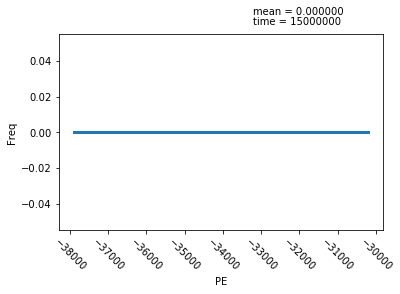

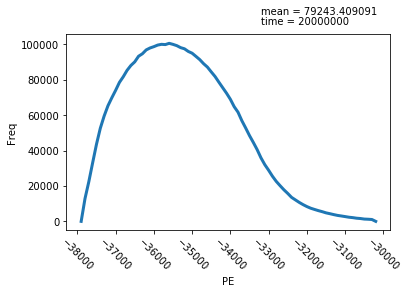

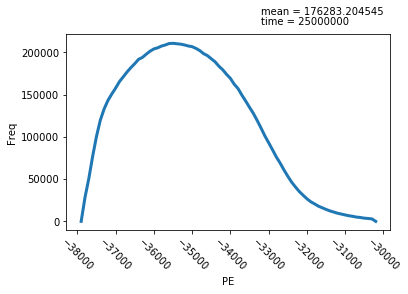

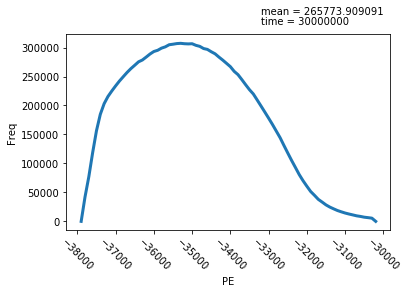

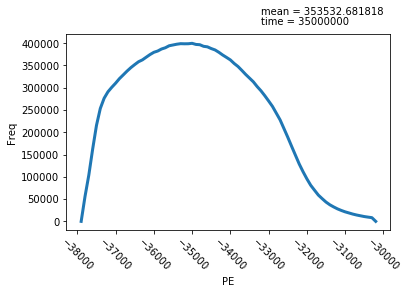

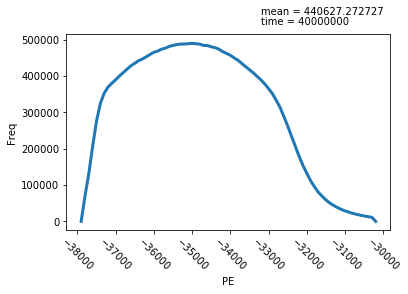

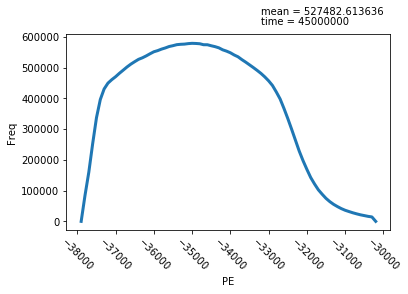

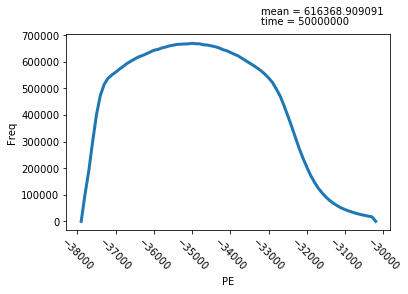

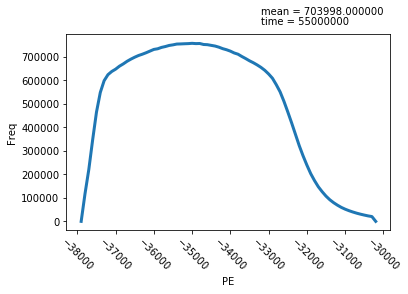

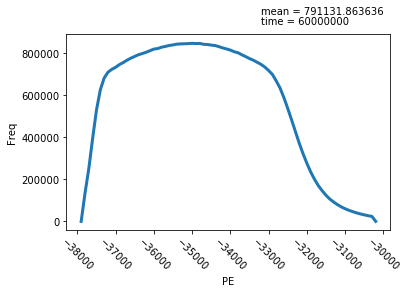

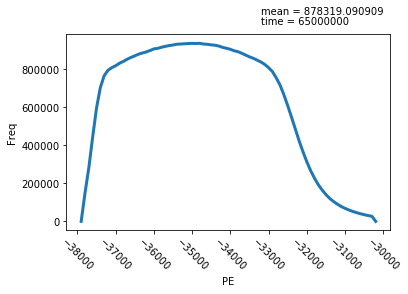

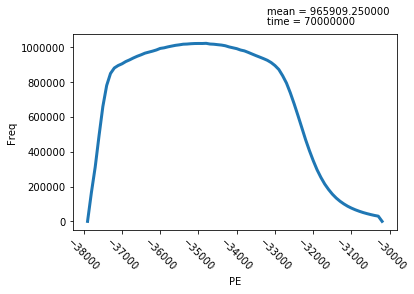

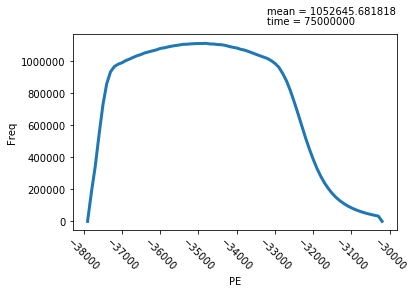

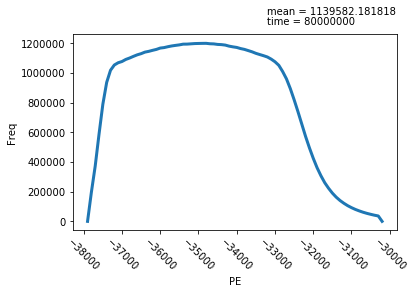

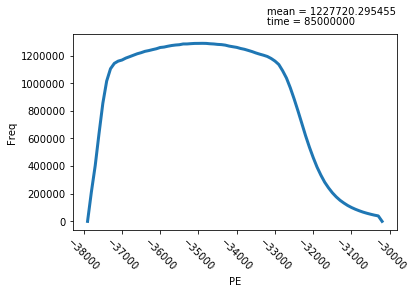

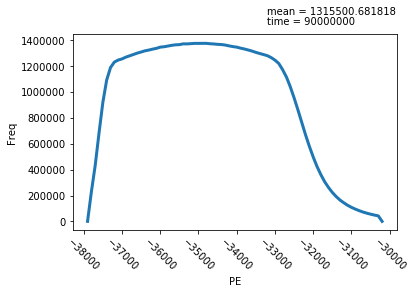

In [13]:
count = 0 #a simple counter of the files
for file in files:
    #let's make sure we are only loading histogram files, i.e., those that start with "hist_" and ends in ".txt"
    #Note file.find returns the position in the string; if no match is found it returns -1
    
    if file.find('hist_') != -1:
        if file.find('.txt') != -1:
            
            #get the timestep this corresponds to from the file name
            temp_file = file.replace('hist_', '')
            temp_file = temp_file.replace('.txt', '')
            
            #this is just an extra check to make sure the filename is formatted as expected
            if temp_file.isdigit():
                current_file = data_directory+"/"+file
                with open(current_file) as f:
                    line = f.readline()
                    temp_array= line.strip().split(' ')
                f.close()
                f_t = temp_array[6]
                mean_t = temp_array[20]
                mean_t = mean_t.replace(';','')
                
                note1 = 'time = ' + f_t
                note2 = 'mean = ' + mean_t
                #load the actual histogram data.  Note we will skip the first row which is the header
                pe, hist, temp  = np.loadtxt(fname=current_file, skiprows=1).T
                
                plt.xlabel('PE')
                plt.ylabel('Freq')
                plt.plot(pe, hist,lw=3)
                plt.xticks(rotation=-45)
                plt.annotate(note1, xy=(0.6, 1.05), xycoords='axes fraction')
                plt.annotate(note2, xy=(0.6, 1.1), xycoords='axes fraction')
                plt.subplots_adjust(left=0.15, bottom=0.2) #adjust the margins so things don't get cutoff
                    
                #name of image to output.  Note I'm using the C-style find and replace
                #to make sure that the integer count is padded with zeros, 
                #so the name appears as, e.g., temp_hist.000000000001.png instead of temp_hist.1.png
                #this is essential so that ffmpeg puts the images in the right order
                fname = "temp/temp_hist.%012d.png" % count
                    
                plt.savefig(fname)
                count = count + 1
                plt.show()

            
        

This will have generated  separate png images, corresponding to the plots shown above.  E.g., here is the ![5th plot.](temp/temp_hist.000000000004.png)

To join them together we can use ffmpeg. Here is a basic call that will merge the images into an mp4 file:

    ffmpeg -framerate 2/1  -i temp/temp_hist.%12d.png -c:v libx264 -r 30 -pix_fmt yuv420p out.mp4
    
Note, if you change the dataset (e.g., reduce the number of files used) you will need to remove the images  from the temp directory first, otherwise these images will appear at the end of the movie.  

The final animated plot can be seen here. ![Final Animated plot.](out.mp4)